# Data Processing Engine

In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

## Data Importing and Preliminary Cleaning

First, we use a loop to import data from the .xls files--each of which have 3 sheets. We want to focus on the factor data, i.e. "characteristics" sheet.  

In addition, we want the future returns from the "future_returns" sheet to estimated real mean returns. Likewise, we want to expected mean returns from the "returns" sheet which contains historical data. Both of these will be fed to the "characteristics" sheet--i.e. dfChar--so we can estimate the coeficients of each factors. Recall that we hypothesized the estimated expected asset risk premium for each asset to be a linear equation as below:  

\begin{equation}
    \begin{split}
        E[R_i - r_f] =& \gamma_0 + \gamma_2 X_1 + \gamma_3 X_2 + ... \gamma_n X_{n+1} \\
                     =& \gamma_0 + \sum_{i=1}^n \gamma_i X_i  \\
    \end{split}
\end{equation}

In [28]:
import os
import glob
import numpy as np
import pandas as pd

path = os.getcwd() + '/all_data_practice/'
files = os.listdir(path)

dfRet = pd.DataFrame()
dfChar = pd.DataFrame()
dfFutRet = pd.DataFrame()

for filename in files:
    datRet = pd.read_excel(path+filename, sheet_name='returns')
    datChar = pd.read_excel(path+filename, sheet_name='characteristics')
    datFutRet = pd.read_excel(path+filename, sheet_name='future_returns')
    
    # Clean the characteristics sheet before appending
    datChar = datChar.T  # Transpose data so funds' factors end up in rows
    datChar.columns = datChar.iloc[0]  # Set name for columns to be factor name
    datChar.drop(datChar.index[0], inplace=True)  # Dropping unnecessary index row due to tranpose
    
    # Add more factor to the factor table
    datChar["RMRF"] = datRet["RMRF"].mean()  # Initialize expected market returns as a factor
    datChar["RSMB"] = datRet["RSMB"].mean()  # Intialize SMB as a factor
    datChar["RHML"] = datRet["RHML"].mean()  # Initalize HML as a factor
    
    # Add E[R_i - r_f] for each fund the lazy way, there's probably better way to do this
    # We will assume E[R_i] = mean(E[R_{i,j}]) where j indicates the historical month index
    datChar.at["Fund 1", "E_RPRF"] = datRet["Fund 1"].mean() - datRet["RF"].mean()
    datChar.at["Fund 2", "E_RPRF"] = datRet["Fund 2"].mean() - datRet["RF"].mean()
    datChar.at["Fund 3", "E_RPRF"] = datRet["Fund 3"].mean() - datRet["RF"].mean()
    datChar.at["Fund 4", "E_RPRF"] = datRet["Fund 4"].mean() - datRet["RF"].mean()
    datChar.at["Fund 5", "E_RPRF"] = datRet["Fund 5"].mean() - datRet["RF"].mean()
    datChar.at["Fund 6", "E_RPRF"] = datRet["Fund 6"].mean() - datRet["RF"].mean()
    datChar.at["Fund 7", "E_RPRF"] = datRet["Fund 7"].mean() - datRet["RF"].mean()
    datChar.at["Fund 8", "E_RPRF"] = datRet["Fund 8"].mean() - datRet["RF"].mean()
    datChar.at["Fund 9", "E_RPRF"] = datRet["Fund 9"].mean() - datRet["RF"].mean()
    datChar.at["Fund 10", "E_RPRF"] = datRet["Fund 10"].mean() - datRet["RF"].mean()

    # Add actual R_i - r_f based on "future" returns
    datChar.at["Fund 1", "RPRF"] = datFutRet["Fund 1"].mean() - datFutRet["RF"].mean()
    datChar.at["Fund 2", "RPRF"] = datFutRet["Fund 2"].mean() - datFutRet["RF"].mean()
    datChar.at["Fund 3", "RPRF"] = datFutRet["Fund 3"].mean() - datFutRet["RF"].mean()
    datChar.at["Fund 4", "RPRF"] = datFutRet["Fund 4"].mean() - datFutRet["RF"].mean()
    datChar.at["Fund 5", "RPRF"] = datFutRet["Fund 5"].mean() - datFutRet["RF"].mean()
    datChar.at["Fund 6", "RPRF"] = datFutRet["Fund 6"].mean() - datFutRet["RF"].mean()
    datChar.at["Fund 7", "RPRF"] = datFutRet["Fund 7"].mean() - datFutRet["RF"].mean()
    datChar.at["Fund 8", "RPRF"] = datFutRet["Fund 8"].mean() - datFutRet["RF"].mean()
    datChar.at["Fund 9", "RPRF"] = datFutRet["Fund 9"].mean() - datFutRet["RF"].mean()
    datChar.at["Fund 10", "RPRF"] = datFutRet["Fund 10"].mean() - datFutRet["RF"].mean()

    dfChar = dfChar.append(datChar)

In [49]:
# Inspect our data. Looks good!
dfChar

Unnamed: 0,Market capitalization,Book-to-market ratio,Past 2 to 12 month return,Past 1 month return,Past 13 to 60 month return,Stock return variance,Operating profitability,Investment,Accruals,CAPM beta,Net share issuance,RMRF,RSMB,RHML,E_RPRF,RPRF
Fund 1,0.4,-0.4,0.56,0.006,0.25,0.05,0.025,0.175,0.0,0.0,0.11,0.007185,0.001133,0.008832,0.009778,0.007171
Fund 2,-0.2,-0.04,0.2,0.0,0.04,0.02,0.04,0.04,0.0,0.0,0.02,0.007185,0.001133,0.008832,0.010889,0.003342
Fund 3,0.736,0.0405,0.1674,0.0,-0.1476,0.0267,0.0066,0.0066,0.0,0.0,0.066,0.007185,0.001133,0.008832,0.005951,0.009139
Fund 4,0.2,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007185,0.001133,0.008832,0.006294,0.005521
Fund 5,0.2,0.12,-0.6,0.0,-0.12,-0.06,-0.12,-0.12,0.0,0.0,-0.06,0.007185,0.001133,0.008832,-0.000711,0.008233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fund 6,1.0,-0.1,0.5,0.0,0.1,0.05,0.1,0.1,0.5,0.0,0.05,0.007766,-0.005060,0.000513,0.009672,0.008356
Fund 7,1.0,0.12,-0.6,0.0,-0.12,-0.06,-0.12,-0.12,0.0,0.0,-0.06,0.007766,-0.005060,0.000513,0.006392,0.025583
Fund 8,0.472,0.4305,-0.2871,-0.0066,-0.2454,-0.0402,0.0222,-0.1428,0.0,0.0,-0.2871,0.007766,-0.005060,0.000513,0.006174,0.011435
Fund 9,1.0,1.0,-0.2,-0.02,-0.5,0.0,0.25,-0.25,0.0,0.0,-0.2,0.007766,-0.005060,0.000513,0.009567,-0.002842


## Data Inspection  

Next we want to have a visual inspection on each factor correlated to the single-asset portfolio risk premium--RPRF.  

<AxesSubplot:xlabel='RMRF', ylabel='RPRF'>

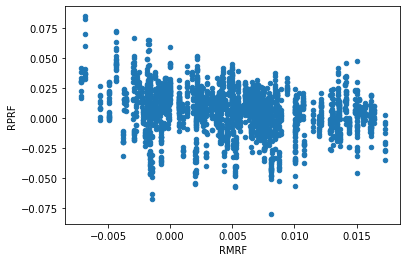

In [30]:
dfChar.plot('RMRF', 'RPRF', kind='scatter')

<AxesSubplot:xlabel='RSMB', ylabel='RPRF'>

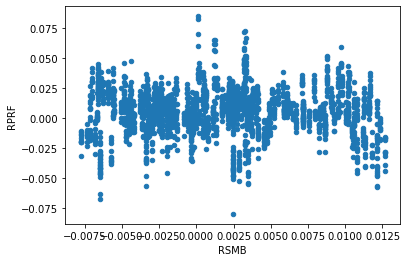

In [31]:
dfChar.plot('RSMB', 'RPRF', kind='scatter')

<AxesSubplot:xlabel='RHML', ylabel='RPRF'>

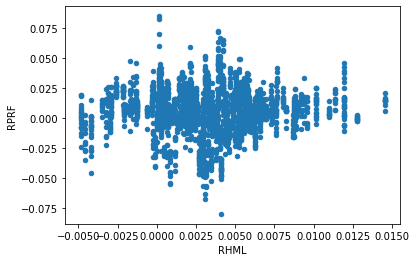

In [32]:
dfChar.plot('RHML', 'RPRF', kind='scatter')

<AxesSubplot:xlabel='Market capitalization', ylabel='RPRF'>

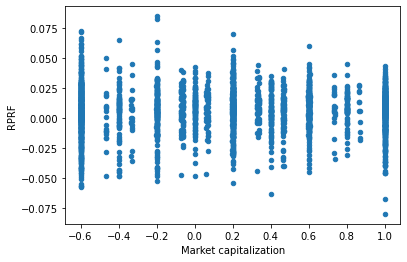

In [33]:
dfChar.plot('Market capitalization', 'RPRF', kind='scatter')

<AxesSubplot:xlabel='Book-to-market ratio', ylabel='RPRF'>

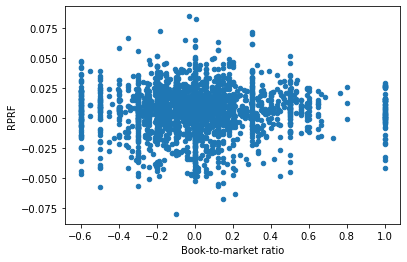

In [34]:
dfChar.plot('Book-to-market ratio', 'RPRF', kind='scatter')

<AxesSubplot:xlabel='Past 2 to 12 month return', ylabel='RPRF'>

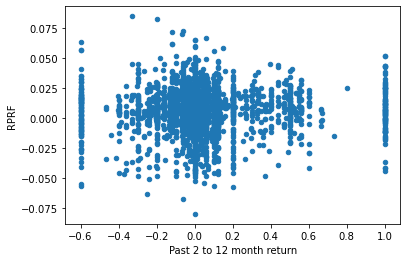

In [35]:
dfChar.plot('Past 2 to 12 month return', 'RPRF', kind='scatter')

<AxesSubplot:xlabel='Past 1 month return', ylabel='RPRF'>

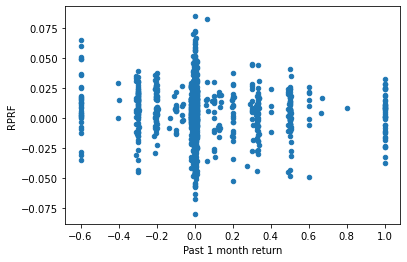

In [36]:
dfChar.plot('Past 1 month return', 'RPRF', kind='scatter')

<AxesSubplot:xlabel='Past 13 to 60 month return', ylabel='RPRF'>

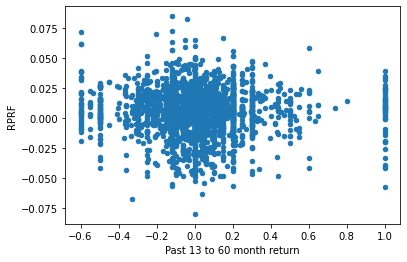

In [37]:
dfChar.plot('Past 13 to 60 month return', 'RPRF', kind='scatter')

<AxesSubplot:xlabel='Stock return variance', ylabel='RPRF'>

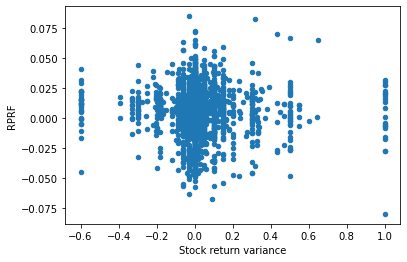

In [38]:
dfChar.plot('Stock return variance', 'RPRF', kind='scatter')

<AxesSubplot:xlabel='Operating profitability', ylabel='RPRF'>

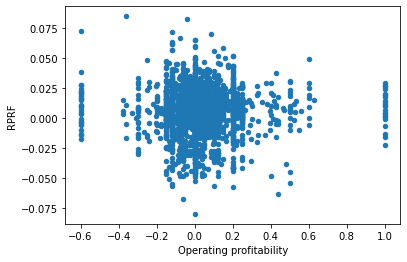

In [39]:
dfChar.plot('Operating profitability', 'RPRF', kind='scatter')

<AxesSubplot:xlabel='Investment', ylabel='RPRF'>

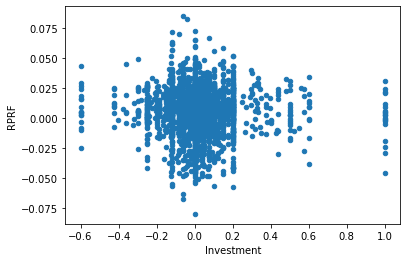

In [40]:
dfChar.plot('Investment', 'RPRF', kind='scatter')

<AxesSubplot:xlabel='Accruals', ylabel='RPRF'>

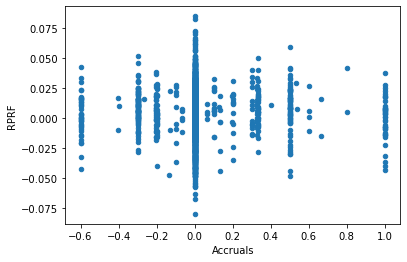

In [41]:
dfChar.plot('Accruals', 'RPRF', kind='scatter')

<AxesSubplot:xlabel='CAPM beta', ylabel='RPRF'>

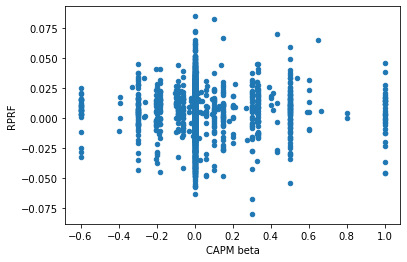

In [42]:
dfChar.plot('CAPM beta', 'RPRF', kind='scatter')

<AxesSubplot:xlabel='Net share issuance', ylabel='RPRF'>

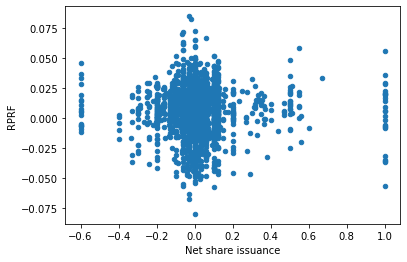

In [43]:
dfChar.plot('Net share issuance', 'RPRF', kind='scatter')

## Data Massaging & Prepping for Machine Learning  

Here, we use the Python scikit-learn ML package.  

First, we determine our numerical factors--there are 14 of them--and categorical factors--none in this case--and put them in 2 separate lists. Then we use sklearn's Pipeline--utilizing a pattern called the command patern, which take data, put them in the beginning of the pipe, then at each juncture, massaging the data into certain formats before outputing in the pipeline using Standard Scaler. The Standard Scaler takes all numerical features and set them to the same scale to prevent features' scales from dominating the model.  

The purpose is to prepare the data for machine learning.  

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, f1_score, r2_score
from sklearn.linear_model import LinearRegression

# Modeling E[R_i - r_p] based on numerical features in the list
num_cols = ['Market capitalization', 
            'Book-to-market ratio', 
            'Past 2 to 12 month return', 
            'Past 1 month return', 
            'Past 13 to 60 month return', 
            'Stock return variance', 
            'Operating profitability', 
            'Investment', 
            'Accruals', 
            'CAPM beta', 
            'Net share issuance',
            'RMRF',
            'RSMB',
            'RHML']

cat_cols = []  # categorical features, empty in this case

# Numerical pipeline
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

# Create full pipeline: including both numeric and categorical pipeline
pipeline = ColumnTransformer([
        ('num', num_pipeline, num_cols), 
        ('cat', OneHotEncoder(), cat_cols)
    ])

all_x_cols = num_cols + cat_cols
y_col = ['E_RPRF']  # this is what we are trying to predict

forest_rgr = LinearRegression()   # using linear regression

## Machine Learning on Expected Asset Returns

### Ordinary Linear Regression  

Below is a primitive linear regression fit. We can see that $R^2$ of the model indicates a poor fit. The numerical method is demonstrated below but we will neither go into details nor use the result.

In [51]:
# Linear Regression
forest_rgr = forest_rgr.fit(dfChar[all_x_cols], dfChar[y_col])

print(f'The coefficients of the factors are:')
forest_rgr.coef_

print(f'The intercept of the factors is: {forest_rgr.intercept_}')

# R2 metrics
train_pred = forest_rgr.predict(dfChar[all_x_cols])
print(f'R2 = {r2_score(dfChar["RPRF"], train_pred)}')

The coefficients of the factors are:


array([[-8.26141950e-04,  3.58578733e-03,  8.13018923e-03,
        -3.84716355e-03, -7.17033703e-04, -3.78842820e-03,
         6.08689198e-04, -2.12775680e-03, -1.80008392e-03,
         1.13674304e-03, -1.76340436e-03,  9.76331355e-01,
         6.27739444e-01,  8.69879167e-02]])

The intercept of the factors is: [-0.00054181]
R2 = -0.23563565646889528


### Supervised Learning  

We will utilize supervised learning to come up with a fit. The method is to utilize known future returns (from the dfFutRet data frame) and historical return (from the dfRet data frame), coupling with the factors in our primary factors data frame (dfChar) to fit a function to estimate expected asset risk premium.  This estimate will be used as an input for our optimization model.  

We notice a half-decent fit with $R^2 \approx 62\%$ 

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfChar[all_x_cols], dfChar[y_col], test_size=0.30)

# Train
X_train_xformed = pipeline.fit_transform(X_train)  # Take X data and squeeze it through the pipeline (do cleaning, impute, etc.)
X_test_xformed = pipeline.transform(X_test)
forest_rgr = forest_rgr.fit(X_train_xformed, y_train.values.ravel())

# Predict
print('Train Returns\n')
train_pred = forest_rgr.predict(X_train_xformed)  # predict using the original data set

print(f'R2: {r2_score(y_train.values.ravel(), train_pred)}')

print('\nTest Returns\n')  # this is what we want to predict
test_pred = forest_rgr.predict(X_test_xformed)

print(f'R2: {r2_score(y_test.values.ravel(), test_pred)}')

eReturnsIntercept = forest_rgr.intercept_
print(f'The intercept of the factors is: {eReturnsIntercept}')

eReturnsCoefs = forest_rgr.coef_
print(f'The coefficients of the factors are:')
eReturnsCoefs

# To repurpose the intercepts and coefficients in other notebooks
intercept = eReturnsIntercept
coefArr = eReturnsCoefs

%store intercept
%store coefArr

del intercept
del coefArr

Train Returns

R2: 0.6878010389644464

Test Returns

R2: 0.6382417340988911
The intercept of the factors is: 0.005892826321073623
The coefficients of the factors are:


array([-5.05445103e-04,  9.07507789e-04,  2.46796015e-03, -7.39882495e-04,
       -3.21815971e-04, -7.55341655e-04, -5.15029443e-05, -2.94201231e-04,
       -2.80309888e-04,  2.10692659e-04, -3.06316569e-04,  4.97911042e-03,
        3.53742536e-03,  2.65027253e-04])

Stored 'intercept' (float64)
Stored 'coefArr' (ndarray)
